<h1 align=center><font size=5>Bagaimana hubungan titik leleh, energi ionisasi pertama, dan jari-jari atom tiap unsur padatan dan pengelompokkannya menggunakan teknik K-Means Clustering</font></h1>

### I. Pendahuluan

<p>Dalam Tabel periodik setiap unsur dikelompokkan kedalam 4 (empat) fasa yakni <b>Padatan</b>, <b>Cair</b>, <b>Gas</b>, dan <b>Buatan (Artificial)</b>. Pada repository kali ini penulis ingin melihat bagaimana hubungan antara <b>Energi Ionisasi Pertama</b>, <b>Titik Leleh</b> dan <b>Jari-Jari atom</b> suatu unsur padatan lalu mengelompokkan nya menggunakan teknik K-Means Clustering.</p>

<p>Dengan penjelasan sederhana, Energi Ionisasi Pertama adalah besarnya energi yang diperlukan untuk melepas satu elektron valensi pada pada suatu unsur, elektron valensi sendiri merupakan elektron yang berada di kulit terluar suatu unsur.</p> Penjelasan lebih lanjut mengenai Energi Ionisasi Pertama dapat dilihat pada tautan <a href="https://en.wikipedia.org/wiki/Ionization_energy" target="_blank">berikut</a>

<p><a href="https://en.wikipedia.org/wiki/Melting_point" target="_blank">Titik leleh</a> adalah suatu nilai temperatur dimana fasa unsur tersebut berubah dari padatan menjadi cair (liquid) dan <a href="https://en.wikipedia.org/wiki/Atomic_radius" target="_blank">Jari-jari atom</a> adalah suatu ukuran jarak dari inti suatu atom ke kulit terluar nya.</p>

Pada teknik Clustering, terdapat banyak tipe algoritma yang dapat digunakan seperti <a href="https://medium.com/analytics-vidhya/partitional-clustering-using-clarans-method-with-python-example-545dd84e58b4" target="_blank">partitioning clustering</a>, <a href="https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec" target="_blank">hierarchial clustering</a> atau <a href="https://towardsdatascience.com/a-gentle-introduction-to-hdbscan-and-density-based-clustering-5fd79329c1e8" target="_blank">density-based clustering</a>. <a href="https://medium.com/analytics-vidhya/k-means-clustering-explained-419ee66d095e" target="_blank">K-Means Clustering</a> sendiri merupakan teknik pengelompokan dimana data yang ada dibagi menjadi 'k' buah kelompok yang tidak saling bertindihan tanpa meihat label data, yang berarti teknik K-Means ini digolongkan ke dalam unsupervised algorithm.
Setiap objek di dalam Cluster memiliki kemiripan dan objek lain yang berada di cluster yang berbeda tidaklah sama atau memiliki perbedaan yang signifikan sehingga ketika ingin menggunakan K-Means Clustering kita perlu mencari objek-objek yang memiliki kemiripan.

### II. Mengimport library yang diperlukan

In [3]:
import pandas as pd
import numpy as np
import requests
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### III. Melakukan import dataset dari github lalu mengelompokkannya berdasarkan fase pada suhu ruang.

In [4]:
url = 'https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv'
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df['Phase'].value_counts()

solid         77
artificial    28
gas           11
liq            2
Name: Phase, dtype: int64

In [5]:
df_solid = df[(df['Phase'] == 'solid')]
df_liquid = df[(df['Phase'] == 'liq')]
df_gas = df[(df['Phase'] == 'gas')]
df_artificial = df[(df['Phase'] == 'artificial')]

#### III.a Melihat hubungan antara titik leleh dan energi ionisasi pertama setiap unsur menggunakan scatter plot.

Text(0, 0.5, 'First Ionization Energy')

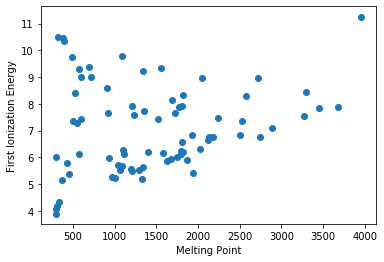

In [23]:
plt.scatter(df_solid['MeltingPoint'], df_solid['FirstIonization'])
plt.xlabel('Melting Point')
plt.ylabel('First Ionization Energy')

<p> Dari gambar diatas kita melihat hubungan yang tak linier, yakni ketika titik leleh unsur padatan meningkat justru energi ionisasi pertama unsur tersebut tidak meningkat atau dapat dikatakan mengerucut pada nilai rata-rata energi ionisasi pertama sekelompok unsur yang ada.

#### III.b Menentukan nilai K dan evaluasi hasil dari setiap nilai K (Pada kasus ini penulis memakai dua nilai K yang berbeda)

Ketika kita melakukan teknik <a href="https://www.youtube.com/watch?v=EItlUEPCIzM&t=1244s" target="_blank">K-Means Clustering</a>, kita perlu menentukan/mencari nilai SSE (Sum of Squared Errors) dari setiap nilai K yang ingin kita pakai. Kita melakukan plot sederhana menggunakan nilai titik leleh dan energi ionisasi pertama sebelumnya.

In [27]:
range_k = range(1,10)
sse = [] # sse stands for Sum of Squared Errors
for k in range_k:
    km = KMeans(n_clusters = k)
    km.fit(df_solid[['MeltingPoint','FirstIonization']])
    sse.append(km.inertia_)

In [29]:
sse

[58606762.13714174,
 20251903.653216332,
 8302173.824751332,
 4265973.588493571,
 2174582.3854922904,
 1535363.7815194703,
 1159327.0593175085,
 885206.4541322647,
 616349.9648409951]

Setelah nilai SSE untuk setiap K (misal dari 1 sampai dengan 9) diperoleh, maka hubungannya sebagai berikut : 

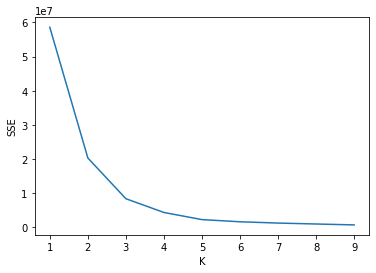

In [30]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range_k,sse)

Grafik diatas membentuk seperti lengan dan siku manusia, nilai K tepat untuk digunakan biasanya terletak di titik belok yakni K = 3 dan K = 4

#### Pertama kita mengevaluasi jika K = 4

In [31]:
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
y_predicted = km.fit_predict(df_solid[['MeltingPoint','FirstIonization']])
y_predicted

array([0, 3, 1, 1, 0, 2, 2, 3, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       0, 2, 2, 0, 0, 2, 3, 3, 1, 1, 1, 3, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2])

In [13]:
df_solid['cluster'] = y_predicted
df_solid.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence,cluster
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,0.534,453.85,1615.0,5.0,Arfvedson,1817.0,3.582,2,1.0,0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,1.850,1560.15,2742.0,6.0,Vaulquelin,1798.0,1.825,2,2.0,3
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,2.340,2573.15,4200.0,6.0,Gay-Lussac,1808.0,1.026,2,3.0,1
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,...,2.270,3948.15,4300.0,7.0,Prehistoric,NaN,0.709,2,4.0,1
10,11,Sodium,Na,22.990,12,11,11,3,1.0,solid,...,0.971,371.15,1156.0,7.0,Davy,1807.0,1.228,3,1.0,0


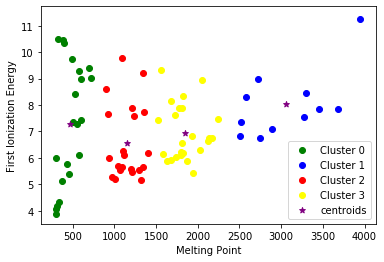

In [52]:
df1 = df_solid[df_solid.cluster == 0]
df2 = df_solid[df_solid.cluster == 1]
df3 = df_solid[df_solid.cluster == 2]
df4 = df_solid[df_solid.cluster == 3]

plt.scatter(df1['MeltingPoint'], df1['FirstIonization'], color = 'green', label = 'Cluster 0')
plt.scatter(df2['MeltingPoint'], df2['FirstIonization'], color = 'blue', label = 'Cluster 1')
plt.scatter(df3['MeltingPoint'], df3['FirstIonization'], color = 'red', label = 'Cluster 2')
plt.scatter(df4['MeltingPoint'], df4['FirstIonization'], color = 'yellow', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroids') # I create this for centroid of each cluster

plt.xlabel('Melting Point')
plt.ylabel('First Ionization Energy')
plt.legend()

Untuk melihat hubungan yang lebih jauh kita memasukkan parameter Jari jari atom lalu kita plot ketiga variabel tersebut (Titik leleh, Energi Ionisasi Pertama and Jari-jari atom).

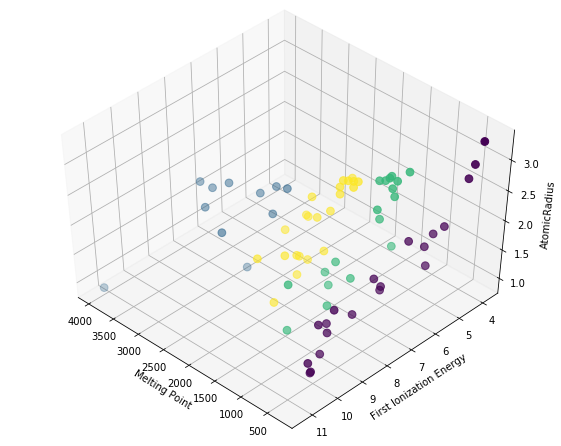

In [15]:
labels = df_solid['cluster']
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Melting Point')
ax.set_ylabel('First Ionization Energy')
ax.set_zlabel('AtomicRadius')

ax.scatter(df_solid['MeltingPoint'], df_solid['FirstIonization'], df_solid['AtomicRadius'], c= labels.astype(np.float), s = 60)

#### Kedua kita melihat jika K = 3

In [35]:
km3 = KMeans(n_clusters = 3)
km3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Kemudian kita membuat feature cluster untuk masing masing unsur padatan

In [36]:
y3_predicted = km3.fit_predict(df_solid[['MeltingPoint','FirstIonization']])
y3_predicted

array([1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Setelah itu memasukkan feature cluster tersebut kedalam data unsur-unsur padatan.

In [37]:
df3_solid = df_solid.copy()
df3_solid['cluster'] = y3_predicted
df3_solid.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence,cluster
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,0.534,453.85,1615.0,5.0,Arfvedson,1817.0,3.582,2,1.0,1
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,1.850,1560.15,2742.0,6.0,Vaulquelin,1798.0,1.825,2,2.0,0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,2.340,2573.15,4200.0,6.0,Gay-Lussac,1808.0,1.026,2,3.0,2
5,6,Carbon,C,12.011,6,6,6,2,14.0,solid,...,2.270,3948.15,4300.0,7.0,Prehistoric,NaN,0.709,2,4.0,2
10,11,Sodium,Na,22.990,12,11,11,3,1.0,solid,...,0.971,371.15,1156.0,7.0,Davy,1807.0,1.228,3,1.0,1


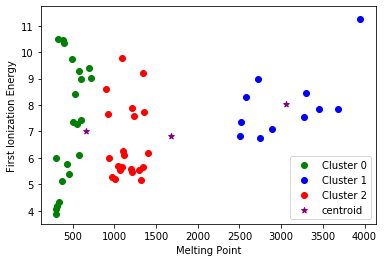

In [41]:
df1 = df3_solid[df_solid.cluster == 0]
df2 = df3_solid[df_solid.cluster == 1]
df3 = df3_solid[df_solid.cluster == 2]

plt.scatter(df1['MeltingPoint'], df1['FirstIonization'], color = 'green', label = 'Cluster 0')
plt.scatter(df2['MeltingPoint'], df2['FirstIonization'], color = 'blue', label = 'Cluster 1')
plt.scatter(df3['MeltingPoint'], df3['FirstIonization'], color = 'red', label = 'Cluster 2')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid') # I create this for centroid of each cluster


plt.xlabel('Melting Point')
plt.ylabel('First Ionization Energy')
plt.legend()

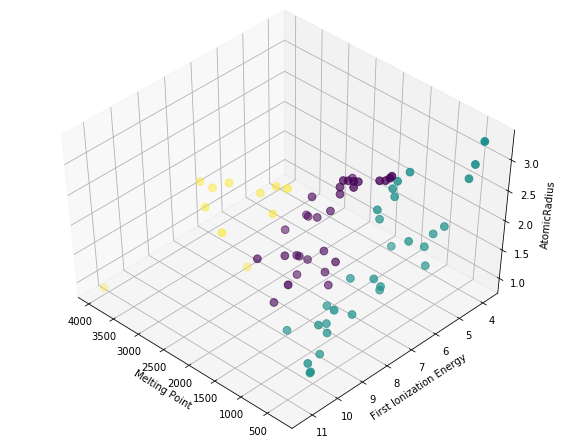

In [50]:
labels = df3_solid['cluster']
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, label = labels)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Melting Point')
ax.set_ylabel('First Ionization Energy')
ax.set_zlabel('AtomicRadius')


ax.scatter(df3_solid['MeltingPoint'], df3_solid['FirstIonization'], df3_solid['AtomicRadius'], c= labels.astype(np.float), s = 60)


### IV. Evaluasi dan Kesimpulan

Dari ketiga variabel yang dipakai, kita dapat melihat bahwa pada unsur-unsur padatan yang memiliki titik leleh rendah umumnya memiliki rentang jari-jari atom yang cukup besar (ada yang besar dan ada juga yang kecil). Hal ini cukup mudah dipahami bahwa ketika ketika jari-jari atom membesar maka energi ionisasi pertama unsur tersebut cukup kecil dan hanya membutuhkan energi yang cukup kecil untuk mem break-up ikatan atom dan merubah fasa nya. Namun pada unsur-unsur padatan yang memiliki titik leleh tinggi pada umumnya memiliki rentang jari-jari atom yang cukup sempit, hal ini mudah dipahami karena ketika jari-jari atom mengecil maka energi ikat atau energi ionisasi pertama unsur tersebut juga membesar hal ini lah yang mengakibatkan titik leleh unsur-unsur tersebut membesar.